In [36]:
# Libraries used
%matplotlib inline
from pymongo import MongoClient
import pandas as pd
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt
import matplotlib.style as style
import cartopy.crs as ccrs
from cartopy.feature import BORDERS

In [120]:
# Importing data from mongoDB
def imp_from_mongodb(year):
    client = MongoClient ('localhost', 27017)
    db = client['companies']
    cur = db.companies.find({'founded_year': {'$gt': year }},
                                {'name':1, 'founded_year': 1, '_id': 0, 'number_of_employees':1,
                                 'offices.latitude':1, 'offices.longitude':1, 'funding_rounds.raised_amount':1, 
                                 'funding_rounds.raised_currency_code':1, 'category_code':1, 'total_money_raised':1}) 
    comp_data = pd.DataFrame(cur)
    return comp_data

# Get latitude 
def get_lat(coord): 
    try: 
        return coord[0]['latitude']
    except:
        return None

# Get longitude    
def get_long(coord): 
    try: 
        return coord[0]['longitude']
    except:
        return None

# Inserting new columns with latitude and longitude    
def insert_latlong(comp_d):   
    comp_d['latitude'] = comp_d['offices'].apply(get_lat)
    comp_d['longitude'] = comp_d['offices'].apply(get_long)
    return comp_d

# Get funding amount
def get_raised(funding): 
    try: 
        return funding[0]['raised_amount']
    except:
        return None

# Get currency    
def get_currency(funding): 
    try: 
        return funding[0]['raised_currency_code']
    except:
        return None

# Inserting new columns with funding and currency    
def insert_funding(funding):   
    funding['raised_amount'] = funding['funding_rounds'].apply(get_raised)
    funding['raised_currency_code'] = funding['funding_rounds'].apply(get_currency)
    return funding

# Dropping columns with dictionarys in them
def col_drop(data):
    data = data.drop(['offices', 'funding_rounds'], axis=1)
    return data

# Creating world map with all the data
def world_map(clean_data):
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.scatter(clean_data['longitude'],clean_data['latitude'], alpha=0.7, s=4, c= '#B44259')
    
# Creating US map with the data
def us_map(clean_data):
    ax = plt.axes(projection=cartopy.crs.PlateCarree())
    ax.add_feature(cartopy.feature.LAND)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.COASTLINE)
    ax.add_feature(cartopy.feature.LAKES, alpha=0.5)
    ax.add_feature(cartopy.feature.BORDERS, linestyle=':')
    ax.scatter(clean_data['longitude'],clean_data['latitude'], alpha=0.7, s=4, c= '#B44259')
    ax.set_extent([8, -128, 50, -45], crs=ccrs.PlateCarree())
    

/usr/local/lib/python3.6/dist-packages/matplotlib/figure.py:98: MatplotlibDeprecationWarning: 
Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  "Adding an axes using the same arguments as a previous axes "


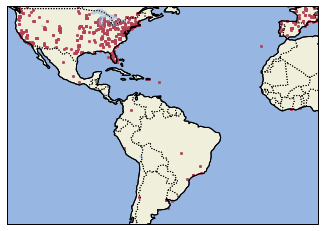

In [121]:
# Main Code
if __name__ == '__main__':
    companies_data = imp_from_mongodb(2005)
    data_location = insert_latlong(companies_data)
    data_loc_fund = insert_funding(data_location)
    clean_data = col_drop(data_loc_fund)
    clean_data.head()
    world_map(clean_data)
    us_map(clean_data)
    #eur_map(clean_data)